In [202]:
import numpy as np
import math
from matplotlib import mlab
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy as sp
import random
import networkx as nx

In [602]:
def find_eulerian(T, stack, tour, i):
    while stack != [-1]:
        j = 0
        while  j < len(T) :
            if T[i, j] == 1:
                stack.append(j)
                T[i, j] = 0
                i = j
                find_eulerian(T, stack, tour, i)
            j = j + 1

        if j == len(T):
            if stack != [-1]:
                stack.pop()
                tour.append(i)
                i = stack[len(stack) - 1]
                find_eulerian(T, stack, tour, i)
    return T, stack, tour, i


In [600]:
def show(voc):
    G = nx.DiGraph()
    for i in range(9):
        G.add_edge(voc[i], voc[i+1])
    G.add_edge(voc[9], voc[0])


    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700 )
    nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=30)  

    plt.axis('off')
    plt.savefig("weighted_graph.png") 
    
    return plt.show() 

Секвенируем последовательность из $A, T, G, C$ длиной 10 и строим граф де Брюина

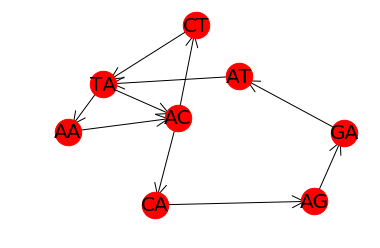

In [601]:
voc = {0:'A', 1:'T', 2:'G', 3:'C'}
st = np.zeros(10)
p = [None]*10

for i in range(10):
    st[i] = random.randint(0,3)
    p[i] = voc.get(st[i])
    i = i + 1

p1 = [None]*10

for i in range(9):
    p1[i] = p[i]+p[i+1]
    i = i + 1
p1[9] = p[9] + p[0]
    
voc_2 = dict(enumerate(p1))
show(voc_2)



По матрице смежности находим цикл Эйлера

In [603]:
G = nx.DiGraph()
for i in range(9):
    G.add_edge(voc_2[i], voc_2[i+1])
G.add_edge(voc_2[9], voc_2[0])

adj_matrix = nx.adjacency_matrix(G)
M = adj_matrix.todense()

for i in range(len(M)):
    M[i, i] = 0
print(M)

stack = []
stack.append(-1)
stack.append(0)

T, stack, tour, i = find_eulerian(M, stack, [], 0)
tour

[[0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]]


[0, 7, 6, 3, 5, 2, 4, 3, 2, 1, 0]

Собираем геном

In [604]:
genom = []
for i in range(len(tour)):
    genom.append(voc_2.get(tour.pop()))
    i = i + 1
genom

['GA', 'AT', 'TA', 'AC', 'CT', 'TA', 'TA', 'AC', 'AA', 'AC', 'GA']